In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

run_simstats...


KeyboardInterrupt: 

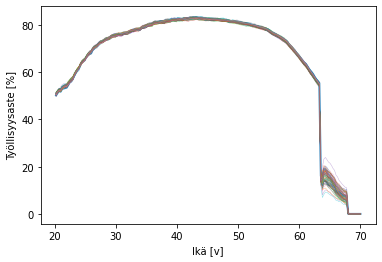

In [3]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortali ty,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.comp_distribs(load='results/baseline/distrib_base_v',n=100,startn=0,stats_results='results/baseline/distrib_stats')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

lisäpäivillä on 6722 henkilöä
Työllisyyden keskiarvo keskiarvo 2095342 htv, mediaani 2095864 htv std 6377 htv
keskiarvo 2265876 työllistä, mediaani 2265543 työllistä, std 6370 työllistä


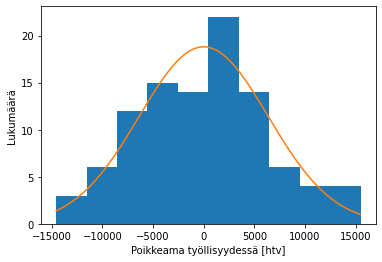

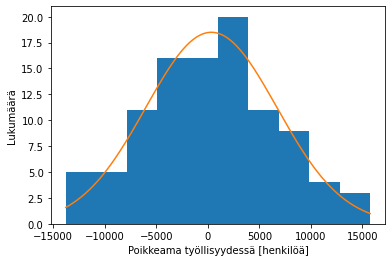

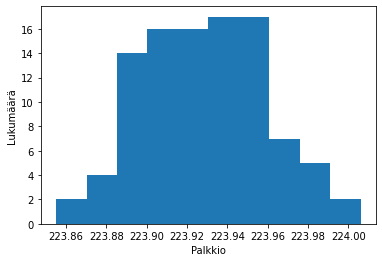

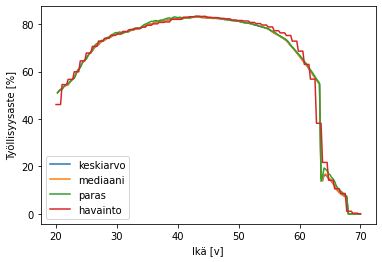

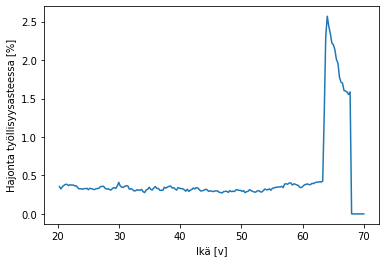

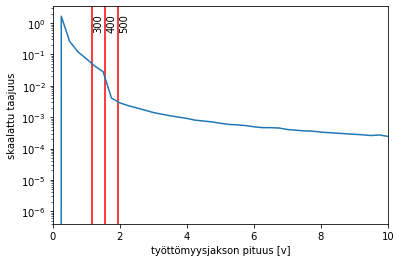

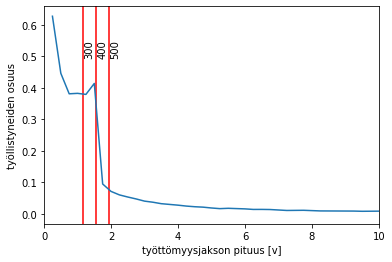

In [4]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)

cc2.render_distrib(stats_results='results/baseline/distrib_stats')

In [ ]:
# Luottamusväli

mu=2095342
std=6377
z=1.96 # 95%
L=z*std/np.sqrt(100)
print('Luottamusväli ({:.0f};{:.0f})'.format(mu-L,mu+L))
print(L)

# Putken poisto

In [ ]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.comp_distribs(load='results/putki/distrib_poisto_v',n=100,startn=0,stats_results='results/putki/distrib_poisto_stats')
cc2.render_distrib(stats_results='results/putki/distrib_poisto_stats')
cc2.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus mediaanityöllisyyteen 4368 htv (2100232 vs 2095864)
Vaikutus keskiarvotyöllisyyteen 4931 htv (2100274 vs 2095342)


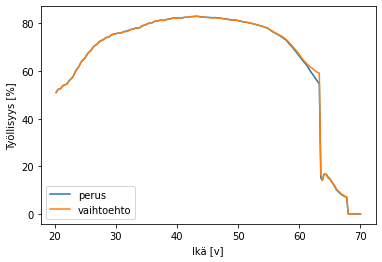

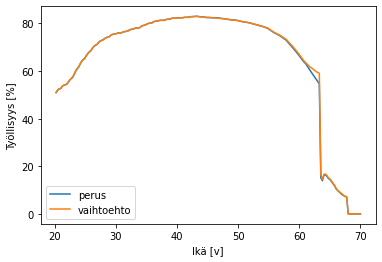

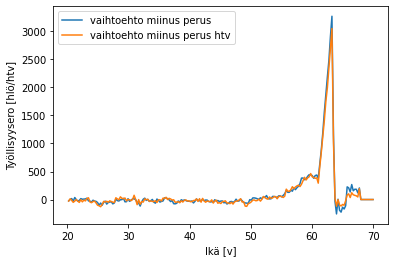

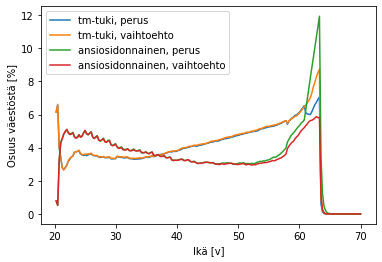

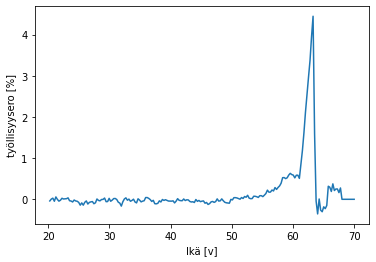

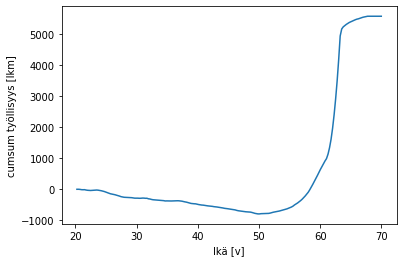

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana -797.9 htv (1416703 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana 4931.4 htv (2100274 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 4165.6 htv (2090274 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana 3485.4 htv (2080210 vs 2076725)
perus keskikesto 0.45408009972590707 v vaihtoehto Keskikesto 0.45246626786644933 v
Skaalaamaton perus lkm 8087768 v vaihtoehto lkm 8081908 v
Skaalaamaton perus työtpäiviä yht 3672494.5 v vaihtoehto työtpäiviä yht 3656790.75 v


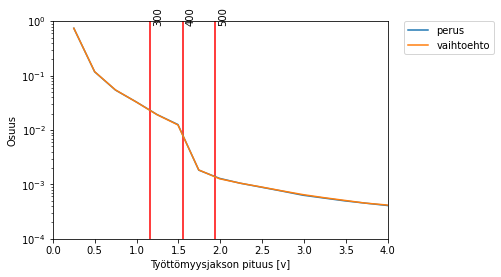

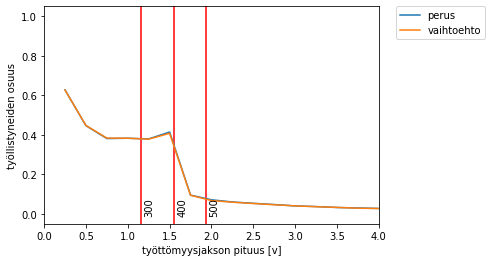

In [5]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')                    



# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

run_simstats...
done
best_emp 90
lisäpäivillä on 3246 henkilöä
Työllisyyden keskiarvo keskiarvo 2121079 htv, mediaani 2121330 htv std 7424 htv
keskiarvo 2295466 työllistä, mediaani 2294322 työllistä, std 7422 työllistä


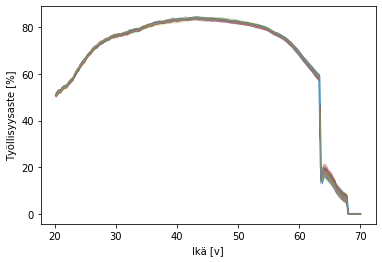

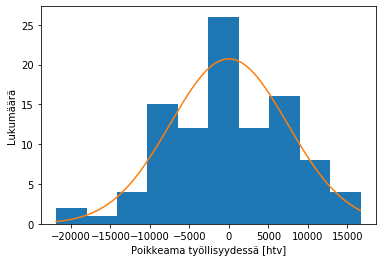

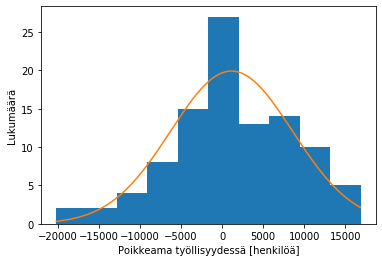

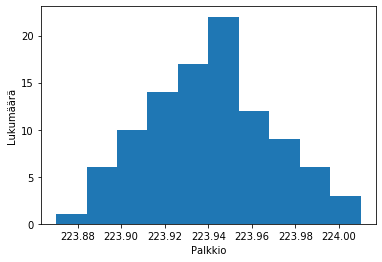

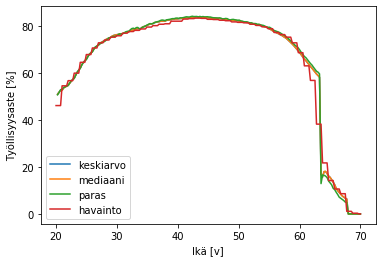

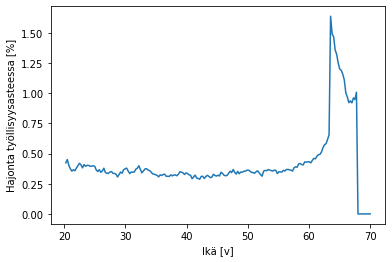

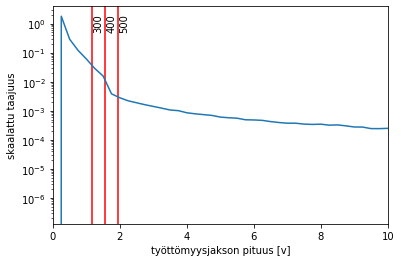

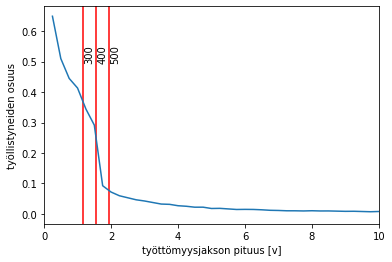

Vaikutus mediaanityöllisyyteen 25465 htv (2121330 vs 2095864)
Vaikutus keskiarvotyöllisyyteen 25737 htv (2121079 vs 2095342)


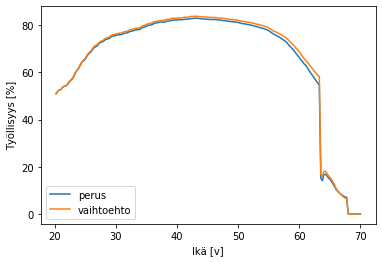

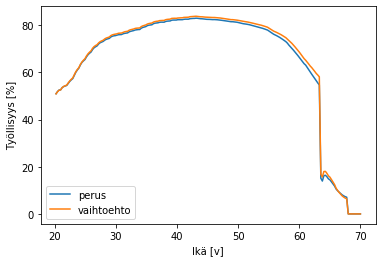

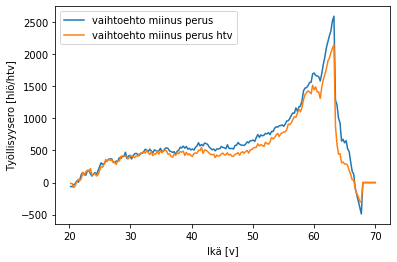

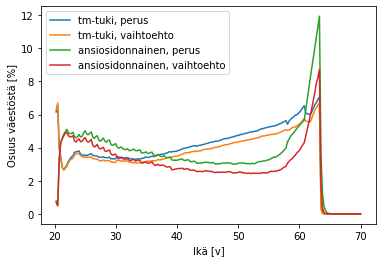

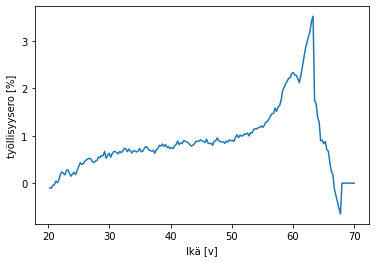

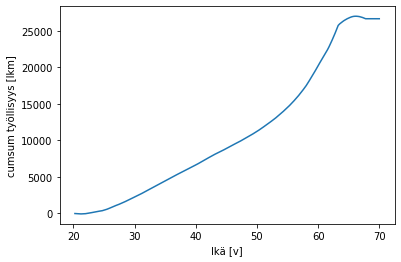

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana 11148.1 htv (1428649 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana 25737.0 htv (2121079 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 25205.6 htv (2111314 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana 24690.5 htv (2101415 vs 2076725)
perus keskikesto 0.42500652681294454 v vaihtoehto Keskikesto 0.45246626786644933 v
Skaalaamaton perus lkm 8281224 v vaihtoehto lkm 8081908 v
Skaalaamaton perus työtpäiviä yht 3519574.25 v vaihtoehto työtpäiviä yht 3656790.75 v


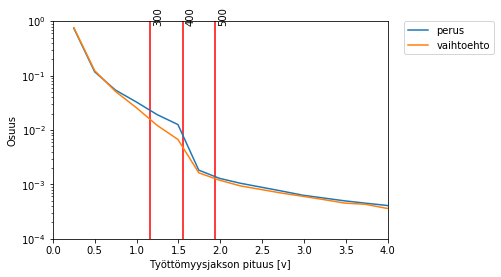

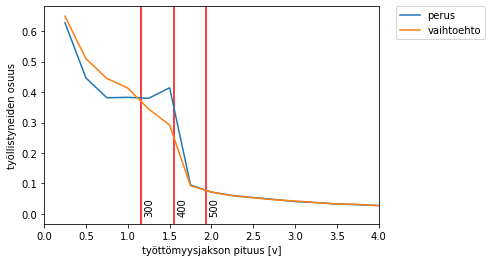

In [7]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.comp_distribs(load='results/porrastus/distrib_porras_v',n=100,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.render_distrib(stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats')                    

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus mediaanityöllisyyteen 25465 htv (2121330 vs 2095864)
Vaikutus keskiarvotyöllisyyteen 25737 htv (2121079 vs 2095342)


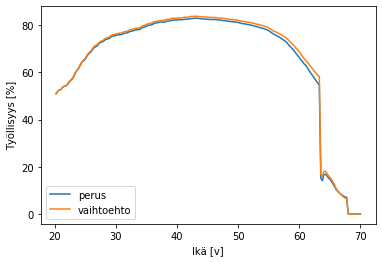

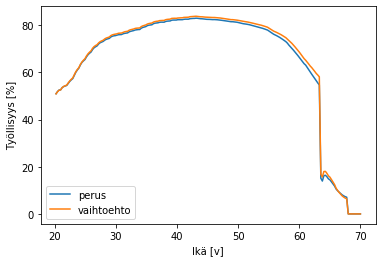

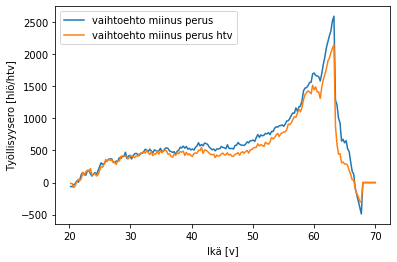

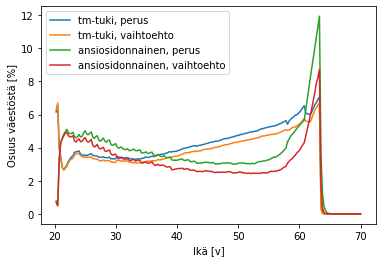

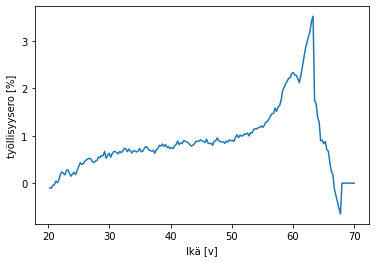

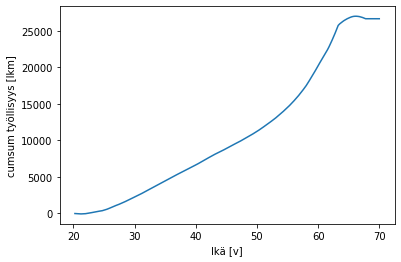

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana 11148.1 htv (1428649 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana 25737.0 htv (2121079 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 25205.6 htv (2111314 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana 24690.5 htv (2101415 vs 2076725)
perus keskikesto 0.42500652681294454 v vaihtoehto Keskikesto 0.45246626786644933 v
Skaalaamaton perus lkm 8281224 v vaihtoehto lkm 8081908 v
Skaalaamaton perus työtpäiviä yht 3519574.25 v vaihtoehto työtpäiviä yht 3656790.75 v


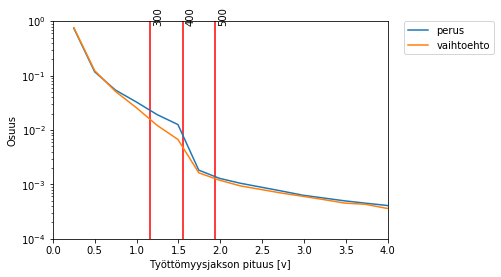

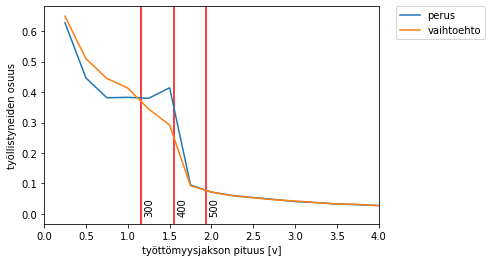

In [8]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats')                    

# 12 kk TOE

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

run_simstats...
done
best_emp 5
lisäpäivillä on 6472 henkilöä
Työllisyyden keskiarvo keskiarvo 2095193 htv, mediaani 2097282 htv std 7180 htv
keskiarvo 2268807 työllistä, mediaani 2269386 työllistä, std 7911 työllistä


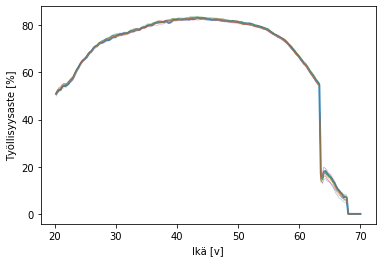

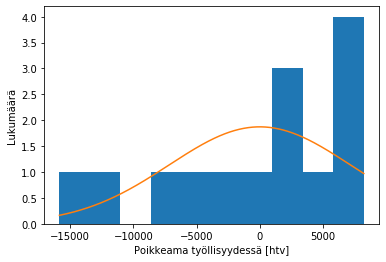

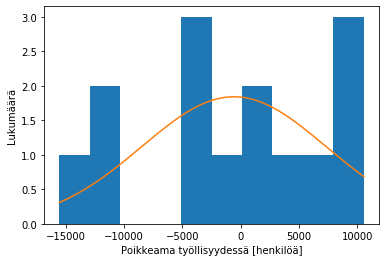

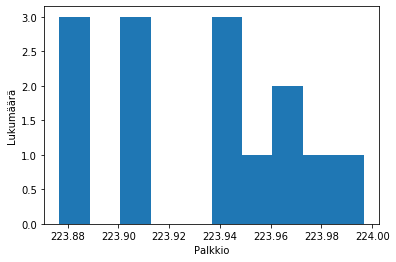

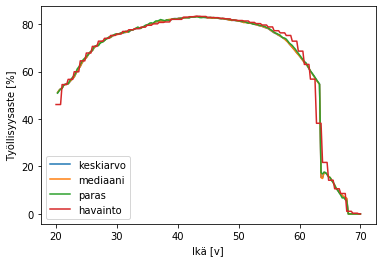

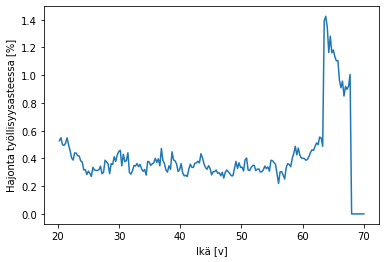

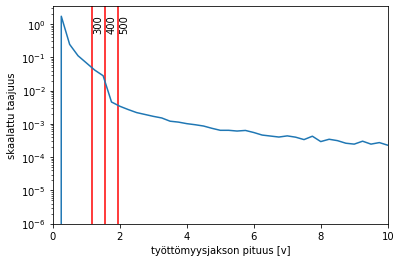

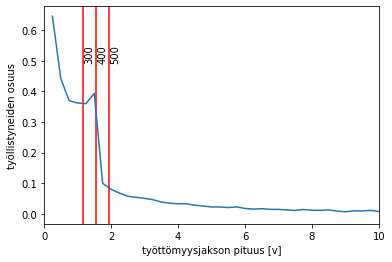

Vaikutus mediaanityöllisyyteen 1418 htv (2097282 vs 2095864)
Vaikutus keskiarvotyöllisyyteen -149 htv (2095193 vs 2095342)


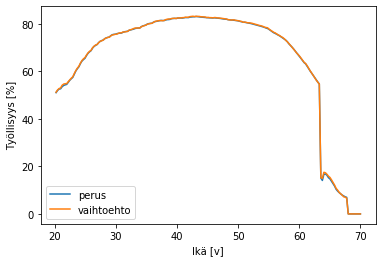

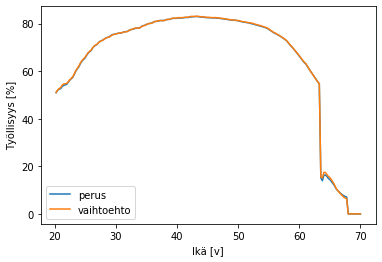

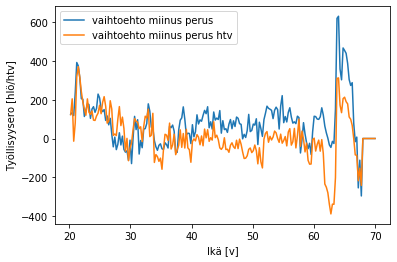

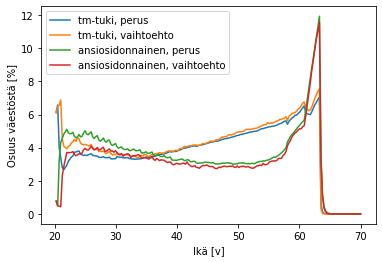

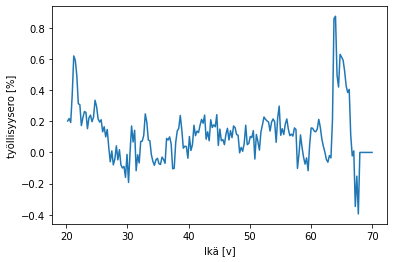

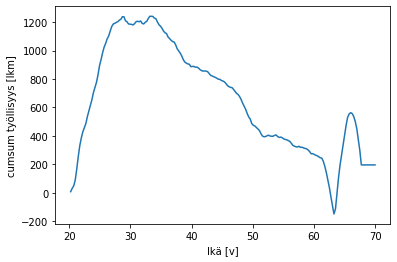

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana 487.0 htv (1417988 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana -149.2 htv (2095193 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -87.2 htv (2086021 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana -28.0 htv (2076697 vs 2076725)
perus keskikesto 0.44719322319367505 v vaihtoehto Keskikesto 0.45246626786644933 v
Skaalaamaton perus lkm 1137586 v vaihtoehto lkm 8081908 v
Skaalaamaton perus työtpäiviä yht 508720.75 v vaihtoehto työtpäiviä yht 3656790.75 v


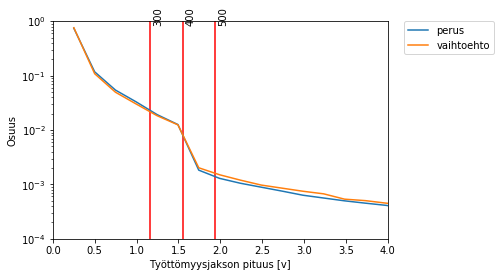

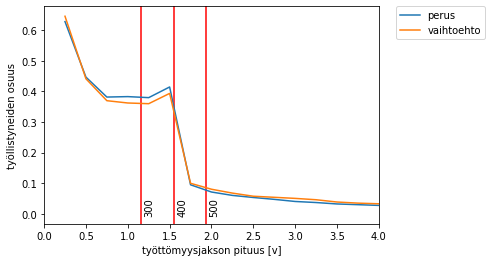

In [10]:
cc1_toe12=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_toe12.comp_distribs(load='results/toe12/distrib_toe12_v',n=14,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.render_distrib(stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')                    

# 50 pv lyhennys

In [ ]:
cc1_50_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_50_b.comp_distribs(load='results/350/distrib_350_v',n=42,startn=0,stats_results='results/350/distrib_350_stats')
cc1_50_b.render_distrib(stats_results='results/350/distrib_350_stats')
cc1_50_b.compare_distrib('results/baseline/distrib_stats','results/350/distrib_350_stats')                    

# Porrastus ilman vaikutusta putkeen

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.comp_distribs(load='results/porrastus_eiputki/distrib_porras_v',n=13,startn=0,stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.render_distrib(stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

In [ ]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_eiputki/distrib_porras_stats',label1='porras',label2='porras, ei putki')

# Porrasta vain 1 askel

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

lisäpäivillä on 6439 henkilöä
Työllisyyden keskiarvo keskiarvo 2083960 htv, mediaani 2080350 htv std 7904 htv
keskiarvo 2258431 työllistä, mediaani 2256612 työllistä, std 7769 työllistä


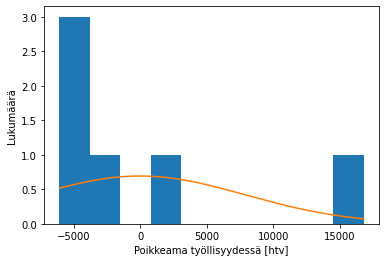

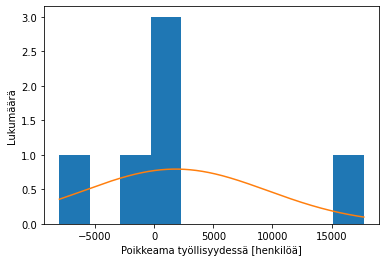

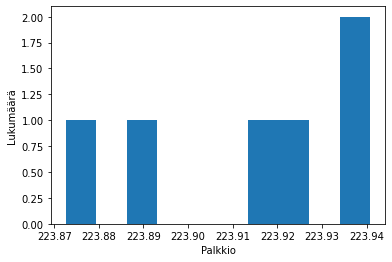

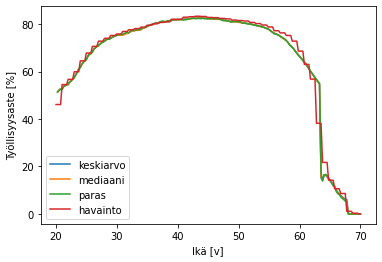

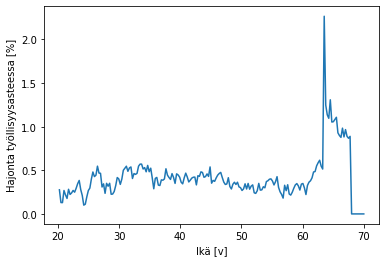

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 30-39 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 60-65 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |     

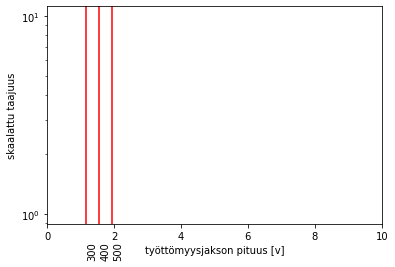

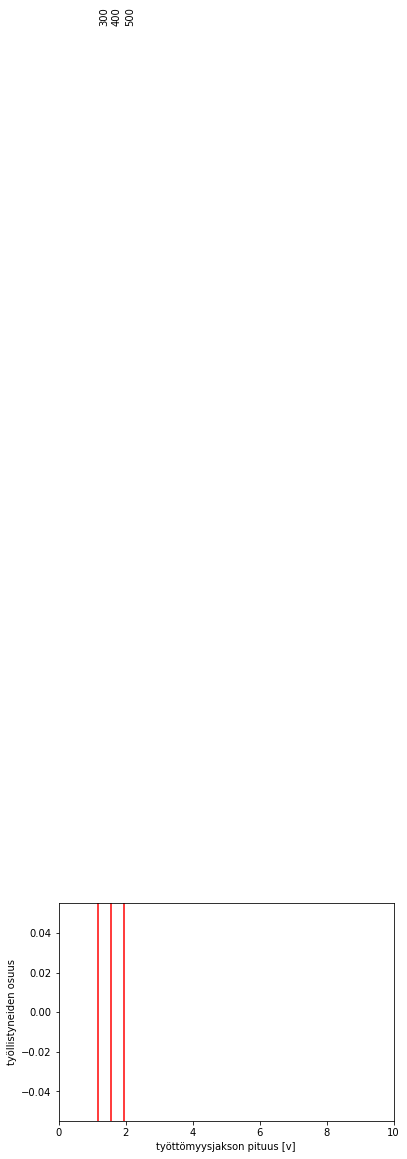

Vaikutus mediaanityöllisyyteen -15515 htv (2080350 vs 2095864)
Vaikutus keskiarvotyöllisyyteen -11382 htv (2083960 vs 2095342)


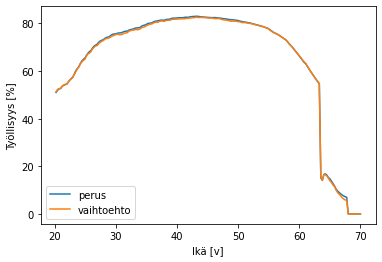

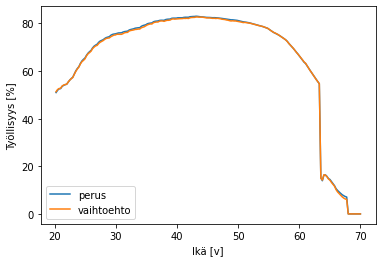

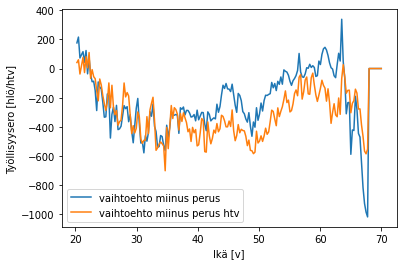

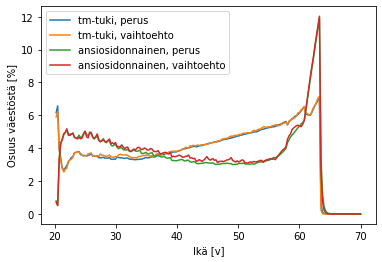

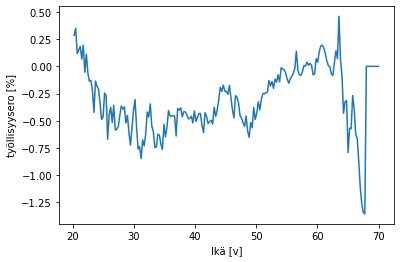

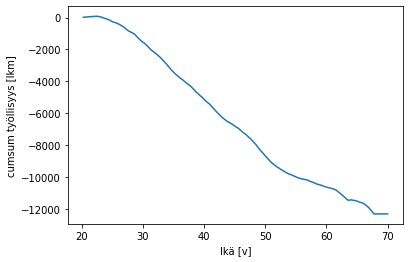

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana -8605.7 htv (1408896 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana -11382.3 htv (2083960 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -11286.0 htv (2074822 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana -11204.0 htv (2065521 vs 2076725)
Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 30-39 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 60-65 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+-------

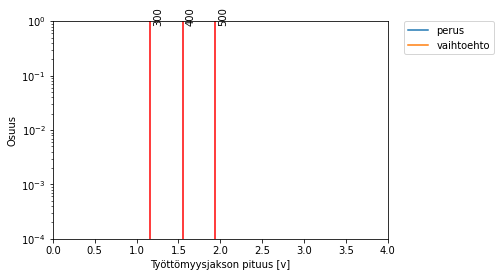

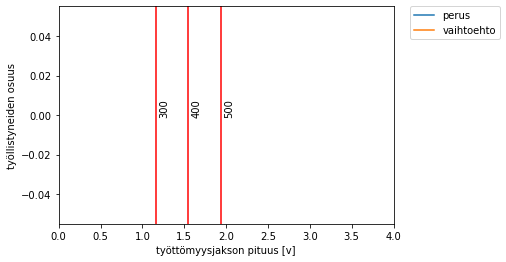

ValueError: operands could not be broadcast together with shapes (1000,1) (202,1) 

In [3]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
#cc2_porras_b.comp_distribs(load='results/porrastus_1askel/distrib_porras_v',n=6,startn=0,stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.render_distrib(stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_1askel/distrib_porras_stats')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus mediaanityöllisyyteen -40980 htv (2080350 vs 2121330)
Vaikutus keskiarvotyöllisyyteen -37119 htv (2083960 vs 2121079)


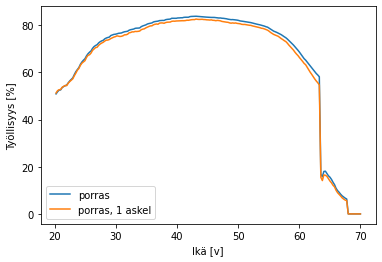

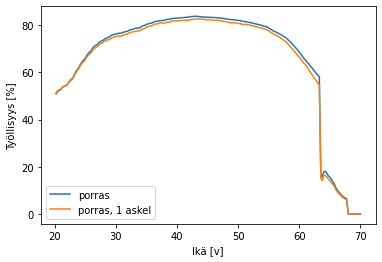

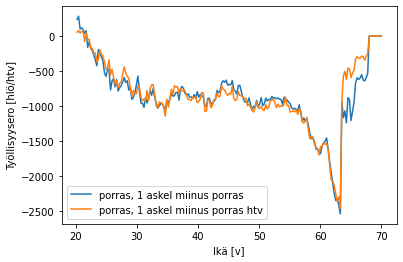

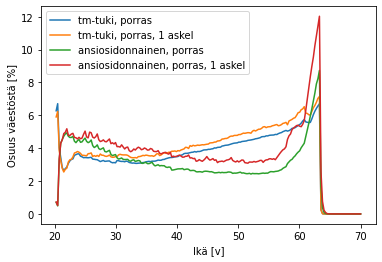

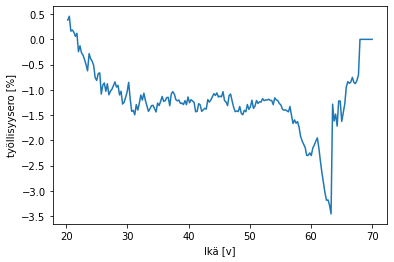

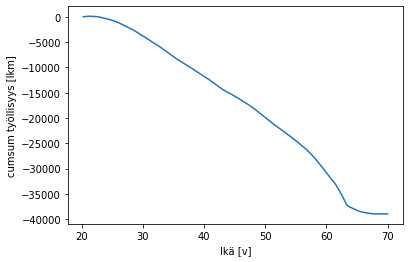

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana -19753.8 htv (1408896 vs 1428649)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana -37119.3 htv (2083960 vs 2121079)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -36491.5 htv (2074822 vs 2111314)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana -35894.5 htv (2065521 vs 2101415)
Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 30-39 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 60-65 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+------

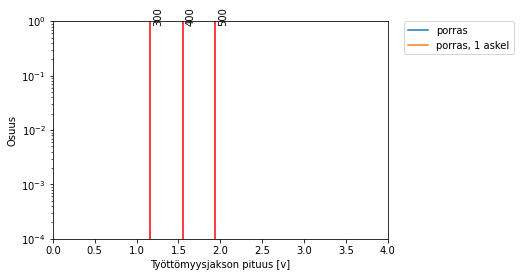

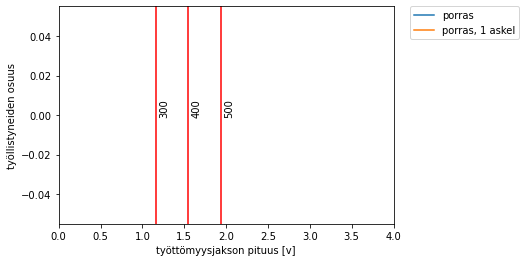

ValueError: operands could not be broadcast together with shapes (1000,1) (202,1) 

In [3]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_1askel/distrib_porras_stats',label1='porras',label2='porras, 1 askel')

# Laskelmia epävarmuuksista

In [12]:
# Epävarmuus

perusmalli_std=6377
vaihtoehto_std=7424
n=100

std_diff=np.sqrt(perusmalli_std**2/n+vaihtoehto_std**2/n)
print('Porrastusen epävarmuus',std_diff)

Porrastusen epävarmuus 978.6823028950713


In [13]:
# Epävarmuus

perusmalli_std=6377
vaihtoehto_std=7110
n=100

std_diff=np.sqrt(perusmalli_std**2/n+vaihtoehto_std**2/n)
print('Putken poiston epävarmuus',std_diff)

Putken poiston epävarmuus 955.0823472350434


# testejä

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Vaikutus mediaanityöllisyyteen 4368 htv (2100232 vs 2095864)
Vaikutus keskiarvotyöllisyyteen 4931 htv (2100274 vs 2095342)


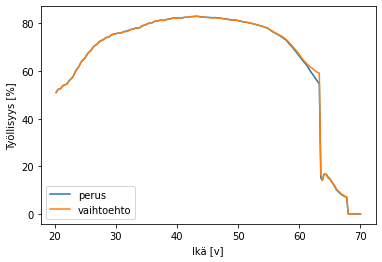

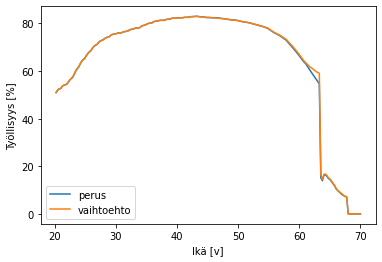

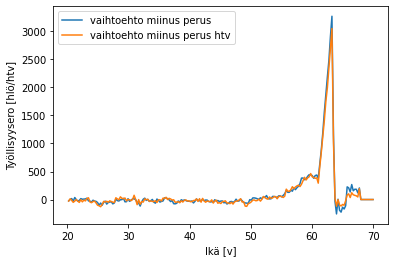

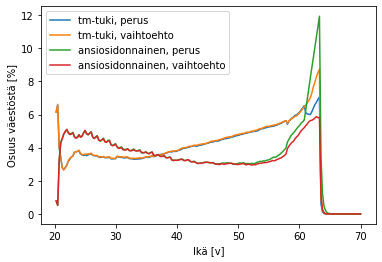

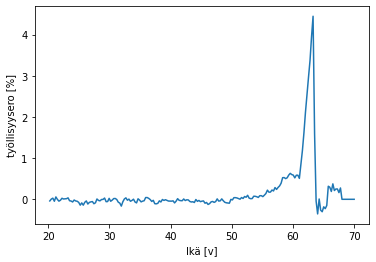

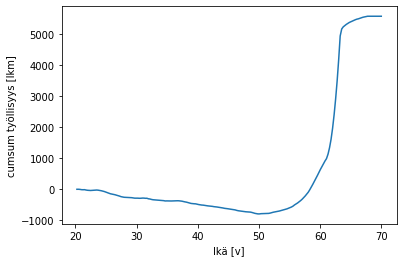

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana -797.9 htv (1416703 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana 4931.4 htv (2100274 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 4165.6 htv (2090274 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana 3485.4 htv (2080210 vs 2076725)
Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.77 |      0.18 |       0.05 |      0.00 |        0.00 |
| 30-39 |     0.68 |      0.22 |       0.10 |      0.00 |        0.00 |
| 40-49 |     0.68 |      0.22 |       0.10 |      0.00 |        0.00 |
| 50-59 |     0.63 |      0.23 |       0.13 |      0.01 |        0.00 |
| 60-65 |     0.31 |      0.20 |       0.17 |      0.12 |        0.20 |
+-------+----------+-----------+--

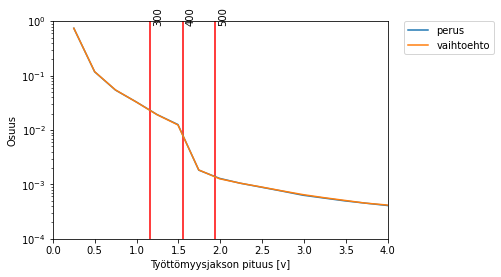

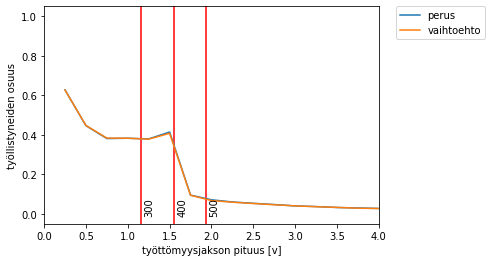

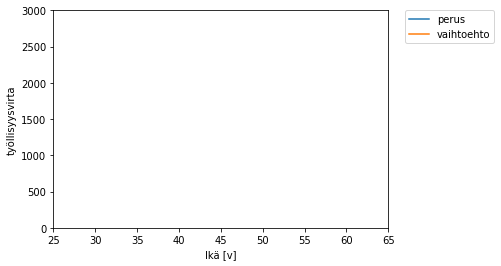

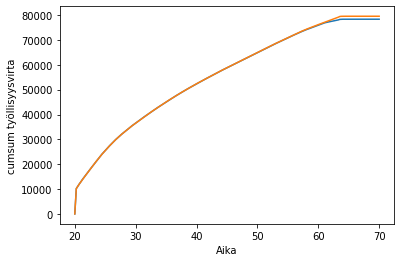

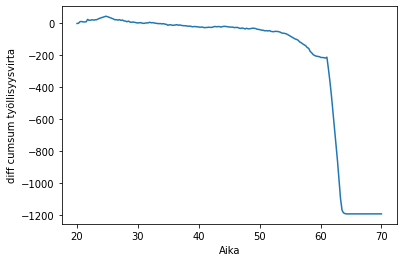

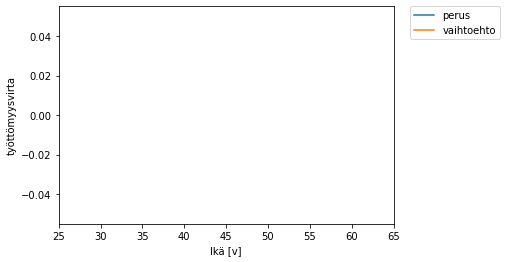

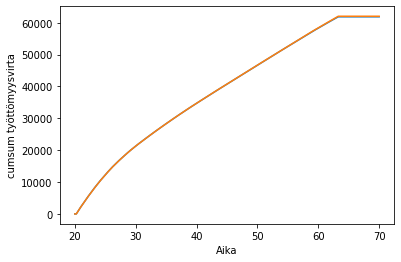

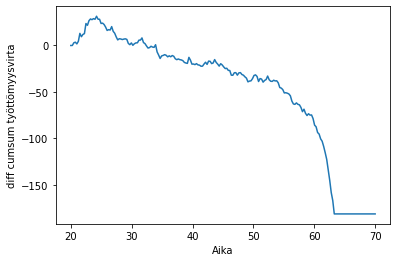

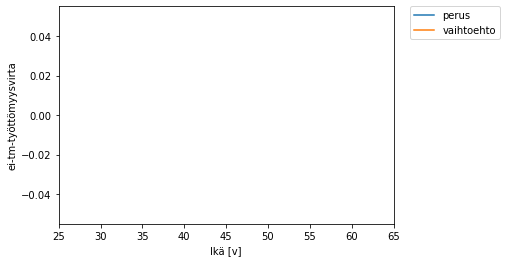

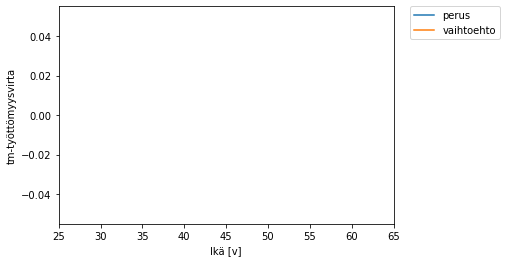

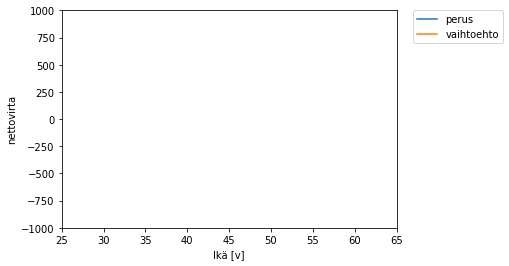

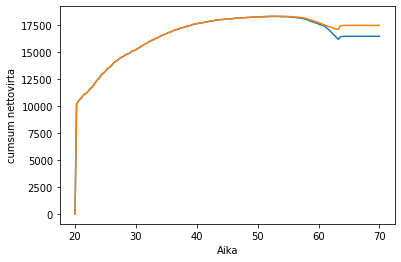

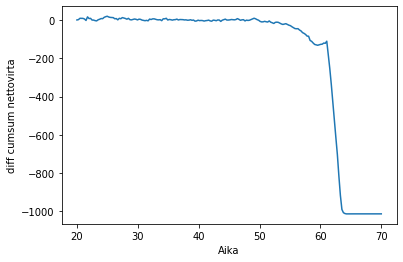

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1.comp_distribs(load='results/baseline/distrib_base_v',n=100,startn=0,stats_results='results/baseline/distrib_stats_b')
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc2.comp_distribs(load='results/putki/distrib_poisto_v',n=100,startn=0,stats_results='results/putki/distrib_poisto_stats_b')
cc2.compare_distrib('results/baseline/distrib_stats_b','results/putki/distrib_poisto_stats_b')



In [5]:
1250/2094092*100

0.059691742292124705